## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install numerize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from numerize import numerize

import seaborn as sns

In [130]:
#Upload the Play Store Data file and perform EDA on the data
play_store_data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project/Play Store Data.csv")

#Exploration of Data

In [4]:
#Top 5 rows of the data (a preview of data)
play_store_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#Last 5 rows of the data 
play_store_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
#Number of column and number of rows 
play_store_data_df.shape

(10841, 13)

In [7]:
#Columns
column_name = play_store_data_df.columns

In [8]:
play_store_data_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [9]:
play_store_data_df[play_store_data_df['Price']=='0']['Price'].count()

10040

In [10]:
play_store_data_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [11]:
play_store_data_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

#Definition of some features
* Type:- App is available 'Free' or 'Paid'.
* Size:- Size of App in MB.
* Price:- Price of App. Out of 10841 rows 10040 apps are free.
* Content Rating:- Related to age of user and availability of particular app to the age group. 
* Current Ver is version of App and Android Ver is version of android in which app will work.

In [12]:
#Information about each column/features
play_store_data_df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Information about the data
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
#Number of null value in 'Rating' feature
play_store_data_df['Rating'].isnull().sum()

1474

#There are small number of NaN value in the columns 'Type', 'Content Rating', 'Current Ver', 'Android Ver'. We will drop NaN rows corresponsding to these columns.

In [131]:
#Remove the rows that contain NaN for some features
play_store_data_df = play_store_data_df.dropna(subset =['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [132]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


# Now consider value corresponding to column 'Rating', here we can not drop the rows directly because this column has sufficient amount of NaN value.
#We will fill the NaN value in rating column with the mean of the column.

In [134]:
#Fill the NaN value in rating column with mean of the column
mean = play_store_data_df['Rating'].mean()
play_store_data_df['Rating'].fillna(mean, inplace = True)

In [135]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


##Now our dataset have no NaN value.

In [136]:
play_store_data_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10829,10829,10829.000000,10829,10829,10829,10829,10829,10829,10829,10829,10829,10829
unique,9648,33,NaN,5999,457,20,2,92,6,119,1376,2831,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1968,NaN,594,1694,1578,10032,10032,8704,840,326,1458,2451
mean,NaN,NaN,4.191838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.479038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Compare the relationship between number of installs and corresponding rating.

In [138]:
#Here we remove those rows that have rating more than 5.0, because that is absurd.
new_play_df = play_store_data_df

In [139]:
new_play_df.shape

(10829, 13)

In [140]:
#Change the dtype of 'Reviews' column into int type
new_play_df["Reviews"] = new_play_df["Reviews"].astype(int)

#Change the dtype of number of installs into int type. For eg. If 10,000+ is there than we change it into integer 10,000. Assuming that number of installs is 10K. 

In [142]:
install_data = new_play_df['Installs']

In [143]:
install_df = pd.DataFrame(install_data)

In [144]:
install_list = install_df['Installs'].tolist()

In [145]:
type(install_list[0])

str

In [146]:
#Add int value in the list
install_list_int = []
for s in install_list:

  str1 = s[:-1].replace(",", "")
  str2 = float(str1)
  install_list_int.append(str2)

In [147]:
#Add new column in dataframe
new_play_df['install_int'] = install_list_int

In [148]:
#We can see last column is integer value of installs
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


Text(0, 0.5, 'Average rating')

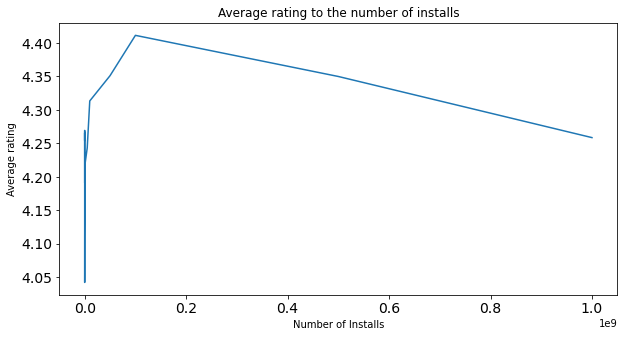

In [149]:
#Create a bar graph for "Average rating to the number of installs".
ax = new_play_df.groupby(["install_int"])["Rating"].mean().plot.line(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average rating to the number of installs")

#X and Y axis labeling
ax.set_xlabel("Number of Installs")
ax.set_ylabel("Average rating")

#We can see number of install doesnot affects the rating average largerly.

In [150]:
column_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [151]:
new_play_df[(new_play_df['Rating']<3) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)]['Installs'].value_counts()

1,000,000+    2
5,000,000+    1
Name: Installs, dtype: int64

In [152]:
new_play_df[(new_play_df['Rating']<3) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)]['App']

5233    Club Penguin Island
5443      3D Holograms Joke
5604      PS4 Second Screen
Name: App, dtype: object

In [153]:
#Rating is greater than 4.5
ash = new_play_df[(new_play_df['Rating']>4.5) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)].groupby(['Category', 'App'])


In [154]:
ash.first()

Rating  ...  install_int
Category          App                                                         ...             
ART_AND_DESIGN    Canva: Poster, banner, card maker & graphic design     4.7  ...   10000000.0
                  Colorfit - Drawing & Coloring                          4.7  ...     500000.0
                  U Launcher Lite – FREE Live Cool Themes, Hide Apps     4.7  ...    5000000.0
                  ibis Paint X                                           4.6  ...   10000000.0
AUTO_AND_VEHICLES AutoScout24 Switzerland – Find your new car            4.6  ...    1000000.0
...                                                                      ...  ...          ...
WEATHER           Fu*** Weather (Funny Weather)                          4.7  ...    1000000.0
                  Klara weather                                          4.6  ...     500000.0
                  Storm Radar: Tornado Tracker & Hurricane Alerts        4.6  ...    1000000.0
                  Weather forecast                                       4.8  ...    1000000.0
                  weather - weather forecast                             4.7  ...    1000000.0

[576 rows x 12 columns]

#From above observation we can say that there are small number of apps that are downloaded above 1 lacs has reviewed by more that 10% of user and has rating less than 3, i.e., if app is installed by more users than we can assume that the app production company is giving good services.
#Conclusion:- We can study those apps production company method and functions that belong to the category in which we are going to make our app to get useful insights for the success of of our app. Eg. If we want "Auto_and_vehicle" category then we will study 'AutoScout24 Switzerland – Find your new car' app.

# Compare installs and size.
#Is size affects the number of installs?

In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'install_int'],
      dtype='object')

In [155]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  install_int     10829 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [157]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


In [159]:
size_lst = new_play_df['Size'].tolist()

In [167]:
for i in range(len(size_lst)):
  if size_lst[i]=='Varies with device':
    size_lst[i]='0M'


In [ ]:
size_lst

In [170]:
size_int_lst =[]
for s in size_lst:
  s1 = s[:-1]
  s2 =float(s1)
  size_int_lst.append(s2)

In [175]:
mean_size = sum(size_int_lst)/len(size_int_lst)

In [182]:
mean_size

31.167734786222102

In [176]:
for i in range(len(size_int_lst)):
  if size_int_lst[i]==0:
    size_int_lst[i]=mean_size


In [178]:
new_play_df['size_in_int'] = size_int_lst

In [183]:
new_play_df['size_in_int'].mean()

36.043359749549005

In [179]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  install_int     10829 non-null  float64
 14  size_in_int     10829 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.3+ MB


Text(0, 0.5, 'Average size')

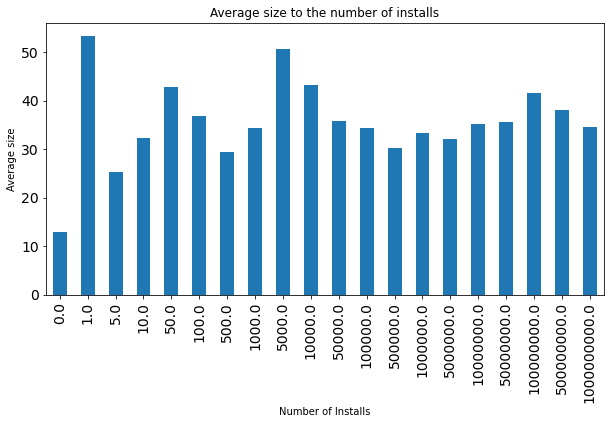

In [181]:
#Create a bar graph for "Average size to the number of installs".
ax = new_play_df.groupby(["install_int"])["size_in_int"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average size to the number of installs")

#X and Y axis labeling
ax.set_xlabel("Number of Installs")
ax.set_ylabel("Average size")

#We can see high downloaded app and less downloaded app have same average size. And Total average of size in 36.04M. We can say success of app is not depend on the size of the app, even app which takes more memory they are also good if they provide required services. 
#Conclusion: For our app if size is around and above the average size than also it will be considerable, i.e., If we add some features(that take some memory) in our app that are not very important but helpful to user, then we must go for it. 

Text(0, 0.5, 'Average number of reviews')

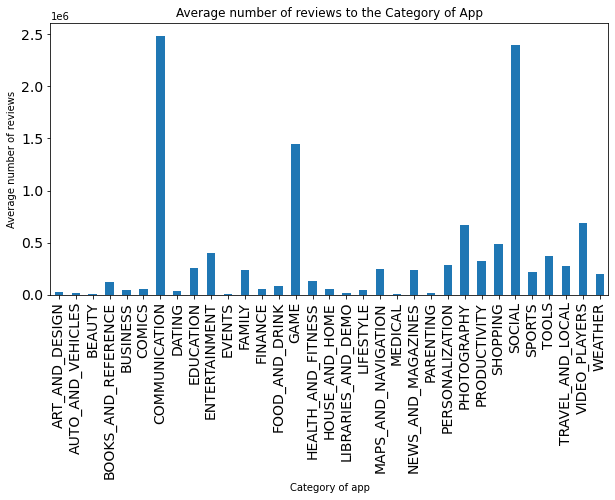

In [ ]:
#Create a bar graph
ax = new_play_df.groupby(["Category"])["Reviews"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average number of reviews to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average number of reviews")

In [ ]:
new_play_df[new_play_df['Category']=="COMMUNICATION"]["App"]

335      Messenger – Text and Video Chat for Free
336                            WhatsApp Messenger
337                             Messenger for SMS
338                  Google Chrome: Fast & Secure
339         Messenger Lite: Free Calls & Messages
                           ...                   
10474                                Sat-Fi Voice
10479                          Free Wi-fi HotspoT
10720          Firefox Focus: The privacy browser
10739              FreedomPop Messaging Phone/SIM
10790                      HipChat - beta version
Name: App, Length: 328, dtype: object

In [ ]:
new_play_df[new_play_df['Category']=="GAME"]["App"]

1653                           ROBLOX
1654                   Subway Surfers
1655                 Candy Crush Saga
1656                        Solitaire
1657                   Bubble Shooter
                     ...             
10791               Winter Wonderland
10792          Soccer Clubs Logo Quiz
10793                       Sid Story
10803    Fatal Raid - No.1 Mobile FPS
10804                    Poker Pro.Fr
Name: App, Length: 1097, dtype: object

In [ ]:
new_play_df[new_play_df['Category']=="SOCIAL"]["App"]

2544                                        Facebook
2545                                       Instagram
2546                                   Facebook Lite
2547     Messages, Text and Video Chat for Messenger
2548                                          Tumblr
                            ...                     
10689                    Alarm.fo – choose your info
10714                  FunForMobile Ringtones & Chat
10765                Chat For Strangers - Video Chat
10799                                 Fr Daoud Lamei
10826      Frim: get new friends on local chat rooms
Name: App, Length: 259, dtype: object

#We can see that from the above bargraph Category : Comunication, Game, and Social have more average number of reviews. Communication app like whatsapp, Messenger etc; Game app like Subway Surfers, Candy Crush, Solitaire etc and Social app like FAcebook, Instagram, Tumblr etc.

#Photography and Video players category are also have good number of reviews.

#Now we study relationship between category and average review

Text(0, 0.5, 'Average Rating')

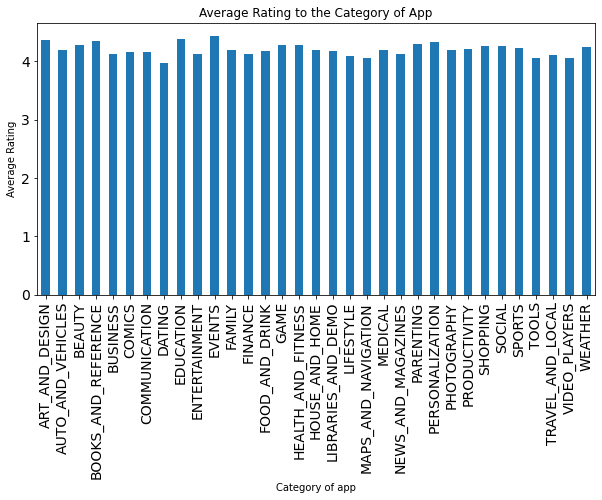

In [ ]:
#Create a bar graph
ax = new_play_df.groupby(["Category"])["Rating"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average Rating to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average Rating")

#Not much difference between the rating among different categories.

#Now plot the distribution plot of rating feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


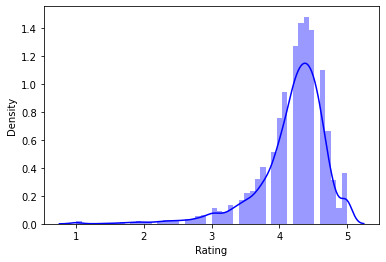

In [ ]:
sns.distplot(new_play_df["Rating"], color = 'blue')

In [ ]:
new_play_df[new_play_df['Rating']>4.0]['App'].count()

6800

In [ ]:
6800/10842*100

62.71905552481092

#We can see that distribution plot of rating is right skewed normal distribution with mean around 4.5. Out 10,841 different entries, 6800 has rating more than 4.0 rating, i.e., more than 62.7 % of app have this rating.

In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# We draw the pie chart and calculate the percent of app belonging to different content rating of app.

In [ ]:
#using groupby count the number of app to correspondind content rating
data = new_play_df.groupby(['Content Rating'])["App"].count()

In [ ]:
data

Content Rating
Adults only 18+       3
Everyone           7420
Everyone 10+        397
Mature 17+          461
Teen               1084
Unrated               1
Name: App, dtype: int64

In [ ]:
#Create DataFrame
data_ = pd.DataFrame(data)

In [ ]:
data_

,App
Content Rating,
Adults only 18+,3
Everyone,7420
Everyone 10+,397
Mature 17+,461
Teen,1084
Unrated,1


In [ ]:
content_rating_lst = data_.index.tolist()


In [ ]:
data_list = data_["App"].tolist()

Text(0.5, 1.0, 'Percentage of Apps to the content rating of App')

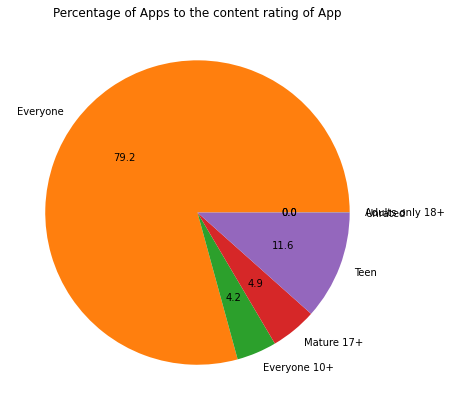

In [ ]:
#Create a pie chat
def func(pct, allvalues):
    '''A function to calculate the percent'''
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data_list,
                                  autopct = lambda pct: func(pct, data_list), labels = content_rating_lst)
#Title
ax.set_title("Percentage of Apps to the content rating of App")

#X and Y axis labeling
# ax.set_xlabel("Category of app")
# ax.set_ylabel("Average Rating")

#Conclusion : Most of the apps belong to "Everyone" content rating. Very few app belong to 'Adult only 18+' and 'Unrate'(overlaped each other). "Teen" rating also contains good amount of

# Draw a pie chat for the number of apps that are installed by more than 10k users. 

In [ ]:
#Collect data
installs_data =new_play_df.groupby(["Installs"])["App"].count()

In [ ]:
#Create Data frame
installs_df = pd.DataFrame(installs_data)

In [ ]:
installs_df

,App
Installs,
1+,3
"1,000+",713
"1,000,000+",1577
"1,000,000,000+",58
10+,69
"10,000+",1010
"10,000,000+",1252
100+,309
"100,000+",1150


In [ ]:
install_list =installs_df.index.tolist()

In [ ]:
# Convert string dtype in installs column to float dtype to collect all the values that are greater 10k, i.e., installs by more than 10k users.
install_list_int = []
for str in install_list:

  str1 = str[:-1].replace(",", "")
  str2 = float(str1)
  install_list_int.append(str2)

In [ ]:
installs_df["number_of_install_int"] = install_list_int

In [ ]:
df = installs_df[installs_df["number_of_install_int"]>10_000]


In [ ]:
df

,App,number_of_install_int
Installs,,
"1,000,000+",1577,1.000000e+06
"1,000,000,000+",58,1.000000e+09
"10,000,000+",1252,1.000000e+07
"100,000+",1150,1.000000e+05
"100,000,000+",409,1.000000e+08
"5,000,000+",752,5.000000e+06
"50,000+",467,5.000000e+04
"50,000,000+",289,5.000000e+07
"500,000+",538,5.000000e+05


In [ ]:
app_list = df['App'].tolist()

In [ ]:
number_of_install_int_list = df['number_of_install_int'].tolist()

Text(0.5, 1.0, 'Percentage of Apps to the number of install+')

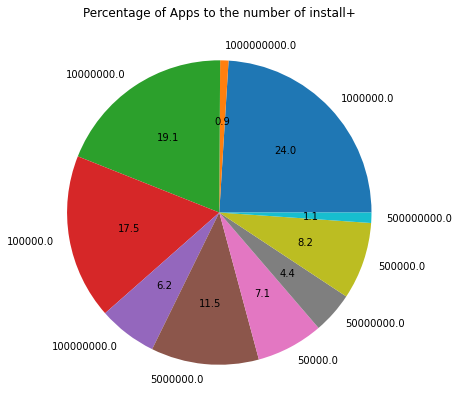

In [ ]:
#Create a pie chat
def func(pct, allvalues):
    '''A function to calculate the percent'''
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(app_list,
                                  autopct = lambda pct: func(pct, app_list), labels = number_of_install_int_list)
#Title
ax.set_title("Percentage of Apps to the number of install+")


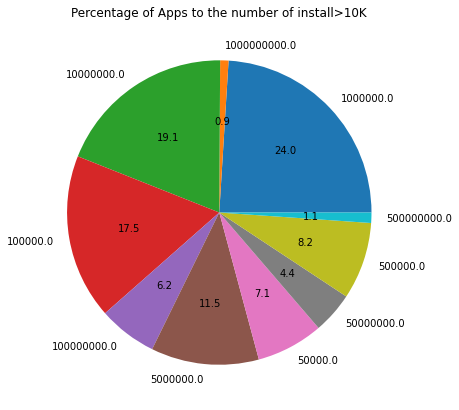

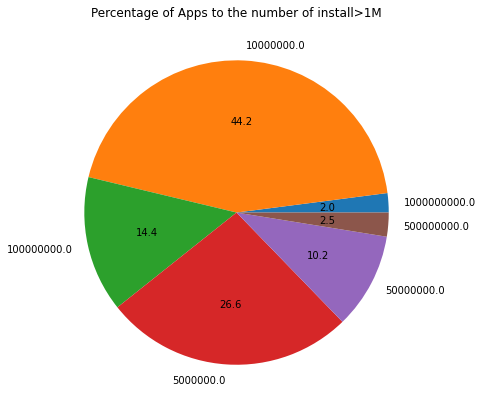

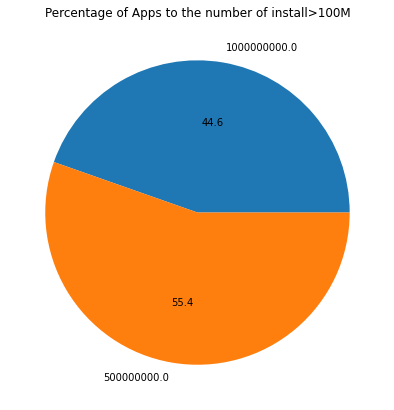

In [ ]:
for number in [1e4, 1e6, 1e8]:
  df = installs_df[installs_df["number_of_install_int"]>number]
  app_list = df['App'].tolist()
  number_of_install_int_list = df['number_of_install_int'].tolist()
  fig, ax = plt.subplots(figsize =(10, 7))
  wedges, texts, autotexts = ax.pie(app_list, 
                                    autopct = lambda pct: func(pct, app_list), labels = number_of_install_int_list)
  ax.set_title(f"Percentage of Apps to the number of install>{numerize.numerize(number)}")




#19.1 % apps in the list of app are installed by $10^7$ users. 17.5% apps are installs by $10^5$ users. We can see in the pie chart app which are installs for more than $10^9$ and $5*10^8$ are less in number.  

#From the above two graph we can conclude that most of the apps are available for "Everyone" and are downloaded by more than 10 lakhs users.